<a href="https://colab.research.google.com/github/wizard339/education/blob/main/intro_to_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
from collections import Counter

# Text preprocessing

## simple operations

Now we gone start to work with text. First of all we need to download and simple look at our texts. Lets start from simple preprocessing - lower all text and delete stop words.

In [1]:
!wget https://raw.githubusercontent.com/MastafaF/multilingual_book_corpus/master/data/harry_potter_ru.txt

--2023-01-27 19:44:19--  https://raw.githubusercontent.com/MastafaF/multilingual_book_corpus/master/data/harry_potter_ru.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44944 (44K) [text/plain]
Saving to: ‘harry_potter_ru.txt’

harry_potter_ru.txt 100%[===================>]  43.89K  --.-KB/s    in 0.01s   

2023-01-27 19:44:19 (3.52 MB/s) - ‘harry_potter_ru.txt’ saved [44944/44944]



In [2]:
with open('harry_potter_ru.txt', 'r') as f:
  hp = f.read()

In [3]:
import nltk
nltk.download("stopwords")
nltk.download('punkt')

from nltk.corpus import stopwords
from string import punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
print(hp)

The cursed child 
 Джоан Роулинг "Гарри Поттер и Проклятое дитя"  
ДЕЙСТВИЕ ПЕРВОЕ, СЦЕНА ПЕРВАЯ  
На станции полным полно людей. Их так много! И все они снуют туда-сюда. 
Среди шума и суеты две большие клетки гремят на вершине двух нагруженных тележек. 
Их толкают два мальчика, Джеймс и Альбус Поттер, их мать, Джинни, идет за ними. 
Тридцатисемилетний мужчина, Гарри, несёт на плечах свою дочь Лили... 
Альбус: Папа, он опять мне это говорит! 
Гарри: Джеймс, перестань. 
Джеймс: Я только сказал  что он может попасть в Слизерин. И он мог бы там... (Но глаза отца нехорошо заблестели) Хорошо. 
Альбус (глядя на свою мать) : Ты ведь будешь писать мне? 
Джинни: Если ты хочешь, я буду писать тебе хоть каждый день. 
Альбус: Нет, ну каждый день не надо. Джеймс говорит, что остальные получают письма из дома примерно раз в месяц... 
Гарри: Мы писали вашему брату три раза в неделю в прошлом году. 
Альбус: Что? Джеймс!!!  
Альбус осуждающе смотрит на Джеймса.  
Джинни: Да. вам не стоит верить всему, 

In [5]:
hp = hp.lower()

### Contine working

In [6]:
isinstance(stopwords.words("russian"), list)

True

In [7]:
stop_words = set(stopwords.words("russian"))
stop_words

{'а',
 'без',
 'более',
 'больше',
 'будет',
 'будто',
 'бы',
 'был',
 'была',
 'были',
 'было',
 'быть',
 'в',
 'вам',
 'вас',
 'вдруг',
 'ведь',
 'во',
 'вот',
 'впрочем',
 'все',
 'всегда',
 'всего',
 'всех',
 'всю',
 'вы',
 'где',
 'да',
 'даже',
 'два',
 'для',
 'до',
 'другой',
 'его',
 'ее',
 'ей',
 'ему',
 'если',
 'есть',
 'еще',
 'ж',
 'же',
 'за',
 'зачем',
 'здесь',
 'и',
 'из',
 'или',
 'им',
 'иногда',
 'их',
 'к',
 'как',
 'какая',
 'какой',
 'когда',
 'конечно',
 'кто',
 'куда',
 'ли',
 'лучше',
 'между',
 'меня',
 'мне',
 'много',
 'может',
 'можно',
 'мой',
 'моя',
 'мы',
 'на',
 'над',
 'надо',
 'наконец',
 'нас',
 'не',
 'него',
 'нее',
 'ней',
 'нельзя',
 'нет',
 'ни',
 'нибудь',
 'никогда',
 'ним',
 'них',
 'ничего',
 'но',
 'ну',
 'о',
 'об',
 'один',
 'он',
 'она',
 'они',
 'опять',
 'от',
 'перед',
 'по',
 'под',
 'после',
 'потом',
 'потому',
 'почти',
 'при',
 'про',
 'раз',
 'разве',
 'с',
 'сам',
 'свою',
 'себе',
 'себя',
 'сейчас',
 'со',
 'совсем',
 'так

In [8]:
# YOUR CODE HERE
def delete_stop_words(text: str, stop_words=stop_words) -> str:
  result = list()
  for word in text.split():
    if word.lower() in stop_words:
      continue
    result.append(word)
  return ' '.join(result)

In [9]:
def delete_stop_words(text: str, stop_words=stop_words):
  return ' '.join(word for word in text.split() if word not in stop_words)

In [10]:
new_hp = delete_stop_words(hp)
new_hp

'the cursed child джоан роулинг "гарри поттер проклятое дитя" действие первое, сцена первая станции полным полно людей. много! снуют туда-сюда. среди шума суеты две большие клетки гремят вершине двух нагруженных тележек. толкают мальчика, джеймс альбус поттер, мать, джинни, идет ними. тридцатисемилетний мужчина, гарри, несёт плечах дочь лили... альбус: папа, это говорит! гарри: джеймс, перестань. джеймс: сказал попасть слизерин. мог там... (но глаза отца нехорошо заблестели) хорошо. альбус (глядя мать) : будешь писать мне? джинни: хочешь, буду писать тебе каждый день. альбус: нет, каждый день надо. джеймс говорит, остальные получают письма дома примерно месяц... гарри: писали вашему брату раза неделю прошлом году. альбус: что? джеймс!!! альбус осуждающе смотрит джеймса. джинни: да. стоит верить всему, рассказывает хогвартсе. ваш брат большой любитель пошутить. джеймс (с ухмылкой) : можем идти, пожалуйста? aльбус смотрит своего отца, затем мать. джинни: все, нужно сделать, это идти прям

In [13]:
assert len(new_hp.split()) == 2639, print(len(new_hp.split()))

Now lets calculate all words

In [14]:
from collections import Counter

Counter(hp.split()).most_common(10), Counter(new_hp.split()).most_common(10)

([('и', 114),
  ('не', 94),
  ('я', 88),
  ('в', 86),
  ('на', 68),
  ('что', 67),
  ('это', 52),
  ('ты', 48),
  ('он', 46),
  ('альбус:', 45)],
 [('это', 52),
  ('альбус:', 45),
  ('-', 44),
  ('гарри:', 39),
  ('альбус', 30),
  ('гарри', 25),
  ('скорпиус:', 22),
  ('гермиона:', 20),
  ('скорпиус', 18),
  ('всё', 13)])

### Continue working

In [15]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
# YOUR CODE HERE
def delete_puckt(text: str, punctuation=punctuation) -> str:
    result = list()
    for char in text:
      if char in punctuation:
        continue
      else:
        result.append(char)
    return ''.join(result)

In [17]:
new_hp = delete_puckt(new_hp)

In [19]:
assert len(new_hp) == 18732

## stemming

In [20]:
from nltk.stem import SnowballStemmer

snowball = SnowballStemmer(language="russian")
snowball.stem("Хороший")

'хорош'

### Continue working

In [ ]:
# YOUR CODE HERE
for word in new_hp.split()[:100]:
  print(snowball.stem(word))

## lemmatization

In [22]:
!wget http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
!tar -xvf mystem-3.0-linux3.1-64bit.tar.gz
!cp mystem /bin

--2023-01-27 19:48:18--  http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
Resolving download.cdn.yandex.net (download.cdn.yandex.net)... 5.45.205.244, 5.45.205.245, 5.45.205.241, ...
Connecting to download.cdn.yandex.net (download.cdn.yandex.net)|5.45.205.244|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://cachev2-spb04.cdn.yandex.net/download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz?lid=122 [following]
--2023-01-27 19:48:19--  http://cachev2-spb04.cdn.yandex.net/download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz?lid=122
Resolving cachev2-spb04.cdn.yandex.net (cachev2-spb04.cdn.yandex.net)... 37.9.93.115, 2a02:6b8:117:5::115
Connecting to cachev2-spb04.cdn.yandex.net (cachev2-spb04.cdn.yandex.net)|37.9.93.115|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16457938 (16M) [application/octet-stream]
Saving to: ‘mystem-3.0-linux3.1-64bit.tar.gz’

mystem-3.0-linux3.1 100%[========

In [23]:
from pymystem3 import Mystem

In [24]:
mystem = Mystem('./mystem')
mystem.lemmatize('Хороший')

['хороший', '\n']

In [25]:
!pip install pymorphy2 > /dev/null

In [26]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
morph.parse("Хороший")[0].normal_form

'хороший'

plot words distribution

In [27]:
from matplotlib import pyplot as plt

from nltk import FreqDist
from nltk.tokenize import word_tokenize

def graph(text: str):
    tokens = word_tokenize(text)
    fd = FreqDist(tokens)
    fd.plot(30,cumulative=False)

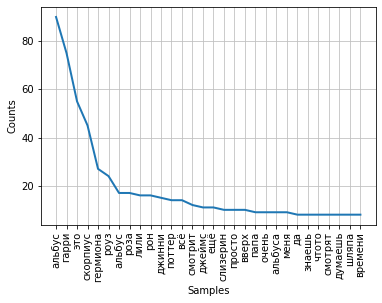

In [28]:
graph(new_hp)

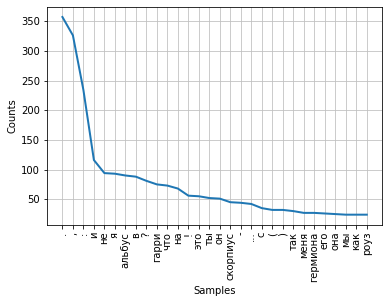

In [29]:
graph(hp)

## wordcloud

In [30]:
from wordcloud import WordCloud

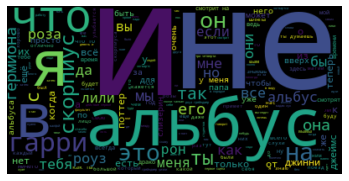

In [31]:
wordcloud = WordCloud().generate(hp)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

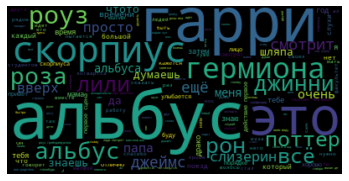

In [32]:
wordcloud = WordCloud().generate(new_hp)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## N-grams

In NLP, you can work not only with individual tokens, but also with groups of tokens that go sequentially. They are named - N-grams, where N - number of sequential tokens

In [33]:
from nltk.util import ngrams

tokenize = word_tokenize(new_hp)
bigrams = ngrams(tokenize, 2)
list(bigrams)

[('the', 'cursed'),
 ('cursed', 'child'),
 ('child', 'джоан'),
 ('джоан', 'роулинг'),
 ('роулинг', 'гарри'),
 ('гарри', 'поттер'),
 ('поттер', 'проклятое'),
 ('проклятое', 'дитя'),
 ('дитя', 'действие'),
 ('действие', 'первое'),
 ('первое', 'сцена'),
 ('сцена', 'первая'),
 ('первая', 'станции'),
 ('станции', 'полным'),
 ('полным', 'полно'),
 ('полно', 'людей'),
 ('людей', 'много'),
 ('много', 'снуют'),
 ('снуют', 'тудасюда'),
 ('тудасюда', 'среди'),
 ('среди', 'шума'),
 ('шума', 'суеты'),
 ('суеты', 'две'),
 ('две', 'большие'),
 ('большие', 'клетки'),
 ('клетки', 'гремят'),
 ('гремят', 'вершине'),
 ('вершине', 'двух'),
 ('двух', 'нагруженных'),
 ('нагруженных', 'тележек'),
 ('тележек', 'толкают'),
 ('толкают', 'мальчика'),
 ('мальчика', 'джеймс'),
 ('джеймс', 'альбус'),
 ('альбус', 'поттер'),
 ('поттер', 'мать'),
 ('мать', 'джинни'),
 ('джинни', 'идет'),
 ('идет', 'ними'),
 ('ними', 'тридцатисемилетний'),
 ('тридцатисемилетний', 'мужчина'),
 ('мужчина', 'гарри'),
 ('гарри', 'несёт'),
 

In [34]:
trigrams = ngrams(tokenize, 3)

In [35]:
list(trigrams)

[('the', 'cursed', 'child'),
 ('cursed', 'child', 'джоан'),
 ('child', 'джоан', 'роулинг'),
 ('джоан', 'роулинг', 'гарри'),
 ('роулинг', 'гарри', 'поттер'),
 ('гарри', 'поттер', 'проклятое'),
 ('поттер', 'проклятое', 'дитя'),
 ('проклятое', 'дитя', 'действие'),
 ('дитя', 'действие', 'первое'),
 ('действие', 'первое', 'сцена'),
 ('первое', 'сцена', 'первая'),
 ('сцена', 'первая', 'станции'),
 ('первая', 'станции', 'полным'),
 ('станции', 'полным', 'полно'),
 ('полным', 'полно', 'людей'),
 ('полно', 'людей', 'много'),
 ('людей', 'много', 'снуют'),
 ('много', 'снуют', 'тудасюда'),
 ('снуют', 'тудасюда', 'среди'),
 ('тудасюда', 'среди', 'шума'),
 ('среди', 'шума', 'суеты'),
 ('шума', 'суеты', 'две'),
 ('суеты', 'две', 'большие'),
 ('две', 'большие', 'клетки'),
 ('большие', 'клетки', 'гремят'),
 ('клетки', 'гремят', 'вершине'),
 ('гремят', 'вершине', 'двух'),
 ('вершине', 'двух', 'нагруженных'),
 ('двух', 'нагруженных', 'тележек'),
 ('нагруженных', 'тележек', 'толкают'),
 ('тележек', 'толка

### Continue working

In [36]:
# YOUR CODE HERE
def make_bigrams(text: str):
  for bigram in zip(text.split(), text.split()[1:]):
    yield bigram

In [37]:
assert len(list(make_bigrams(new_hp))) == len(list(ngrams(tokenize, 2)))

# Solving text classification using OHE

## data lookup

In [38]:
!wget https://raw.githubusercontent.com/susanli2016/NLP-with-Python/master/data/title_conference.csv

--2023-01-27 19:53:02--  https://raw.githubusercontent.com/susanli2016/NLP-with-Python/master/data/title_conference.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 188402 (184K) [text/plain]
Saving to: ‘title_conference.csv’

title_conference.cs 100%[===================>] 183.99K  --.-KB/s    in 0.03s   

2023-01-27 19:53:03 (5.91 MB/s) - ‘title_conference.csv’ saved [188402/188402]



In [40]:
import pandas as pd

In [41]:
df = pd.read_csv('title_conference.csv')
df['Conference'].nunique()

5

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2507 entries, 0 to 2506
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       2507 non-null   object
 1   Conference  2507 non-null   object
dtypes: object(2)
memory usage: 39.3+ KB


In [43]:
df['Conference'].value_counts()

ISCAS       864
INFOCOM     515
VLDB        423
WWW         379
SIGGRAPH    326
Name: Conference, dtype: int64

Lets plot distribution of classes

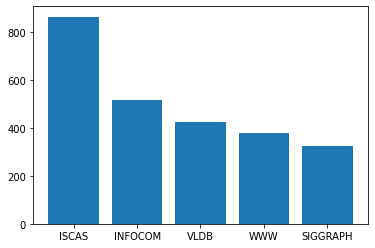

In [44]:
plt.bar(df['Conference'].value_counts().index, df['Conference'].value_counts());

In [45]:
df.head()

,Title,Conference
0,Innovation in Database Management: Computer Sc...,VLDB
1,High performance prime field multiplication fo...,ISCAS
2,enchanted scissors: a scissor interface for su...,SIGGRAPH
3,Detection of channel degradation attack by Int...,INFOCOM
4,Pinning a Complex Network through the Betweenn...,ISCAS


Let`s look up at some categories 

In [46]:
def category_lookup(df, cat):
  return df[df['Conference'] == cat]['Title'].values.tolist()

In [47]:
category_lookup(df, 'INFOCOM')

['Detection of channel degradation attack by Intermediary Node in Linear Networks.',
 'A Quantitative Assured Forwarding Service.',
 'An Explanation for Unexpected 802.11 Outdoor Link-level Measurement Results.',
 'Green Wave: Latency and Capacity-Efficient Sleep Scheduling for Wireless Networks.',
 'Sensor Network Navigation without Locations.',
 'E-V: Efficient visual surveillance with electronic footprints.',
 'Analysis of Price Competition in a Slotted Resource Allocation Game.',
 'Integration of Streaming and Elastic Traffic in Wireless Networks.',
 'MATE: MPLS Adaptive Traffic Engineering.',
 'Adaptive electricity scheduling in microgrids.',
 'Optimizing the Topology of Bluetooth Wireless Personal Area Networks.',
 'Simple sybil-proof mechanisms for multi-level marketing.',
 'CALMS: Cloud-assisted live media streaming for globalized demands with time/region diversities.',
 'A Scalable Method for Access Control in Location-Based Broadcast Services.',
 'Pricing algorithms for the d

In [48]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [49]:
le = LabelEncoder()
le.fit(df['Conference'])
df['Conference'] = le.transform(df['Conference'])
df.head()

,Title,Conference
0,Innovation in Database Management: Computer Sc...,3
1,High performance prime field multiplication fo...,1
2,enchanted scissors: a scissor interface for su...,2
3,Detection of channel degradation attack by Int...,0
4,Pinning a Complex Network through the Betweenn...,1


In [50]:
texts = df['Title'].values
target = df['Conference'].values

## lets get to work

Split train and test data - set test portion as 0.25

In [51]:
# YOUR CODE HERE
texts_train, texts_test, y_train, y_test = train_test_split(texts, target, 
                                                            test_size=0.25,
                                                            random_state=42)

In [52]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
preprocess = lambda text: ' '.join(tokenizer.tokenize(text.lower()))

text = 'How to be a grown-up at work: replace "I don\'t want to do that" with "Ok, great!".'
print("before:", text,)
print("after:", preprocess(text))

before: How to be a grown-up at work: replace "I don't want to do that" with "Ok, great!".
after: how to be a grown - up at work : replace " i don ' t want to do that " with " ok , great !".


### Continue working

In [54]:
import numpy as np

In [55]:
# YOUR CODE HERE
texts_train = np.array(list(map(lambda text: ' '.join(tokenizer.tokenize(text.lower())), texts_train)))
texts_test = np.array(list(map(lambda text: ' '.join(tokenizer.tokenize(text.lower())), texts_test)))

In [56]:
assert texts_train[5] == 'the treescape system : reuse of pre - computed aggregates over irregular olap hierarchies .'
assert texts_test[8] == 'exposing private information by timing web applications .'
assert len(texts_test) == len(y_test)

## Bag of words

One traditional approach to such problem is to use bag of words features:
1. build a vocabulary of frequent words (use train data only)
2. for each training sample, count the number of times a word occurs in it (for each word in vocabulary).
3. consider this count a feature for some classifier

__Note:__ in practice, you can compute such features using sklearn. __Please don't do that in the current assignment, though.__
* `from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer`

In [57]:
k = min(10000, len(set(' '.join(texts_train).split())))

counter = Counter(' '.join(texts_train).split())

bow_vocabulary = list(map(lambda x: x[0], counter.most_common()))

print('example features:', bow_vocabulary[::100])

example features: ['.', 'packet', 'cross', 'similarity', 'fluid', 'sram', 'finding', 'supporting', 'next', 'algorithmic', 'smooth', 'width', 'gossip', 'training', 'conditions', 'mm', 'special', 'elastic', 'rasmalai', 'cmut', 'rise', 'archives', 'tweets', 'multiview', 'genomics', 'nyi', 'leashes', 'ambiguity', 'mirrors', 'bicubic', 'dtmos', 'benchmark', 'hexahedral', 'putting', 'historical', 'rigid', 'outside', 'white', 'compiling', 'uncoded', 'advertiser', 'xquery']


### Continue working

In [58]:
# bow_vocabulary[:10] 
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [59]:
# YOUR CODE HERE
def text_to_bow(doc, bow_vocab=bow_vocabulary):
    bow = [0] * len(bow_vocab)
    for word in doc.split():
      if word in bow_vocab:
        bow[bow_vocab.index(word)] += 1
    return np.array(bow, dtype='float32')

In [60]:
X_train_bow = np.stack(list(map(text_to_bow, texts_train)))
X_test_bow = np.stack(list(map(text_to_bow, texts_test)))

In [61]:
k_max = len(set(' '.join(texts_train).split()))
assert X_train_bow.shape == (len(texts_train), min(k, k_max))
assert X_test_bow.shape == (len(texts_test), min(k, k_max))
assert np.all(X_train_bow[5:10].sum(-1) == np.array([len(s.split()) for s in  texts_train[5:10]]))
assert len(bow_vocabulary) <= min(k, k_max)
assert X_train_bow[6, bow_vocabulary.index('.')] == texts_train[6].split().count('.')

### trainig and predicting

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logit = LogisticRegression(n_jobs=-1, C=1e5, random_state=42)
logit.fit(X_train_bow, y_train)
y_pred = logit.predict(X_test_bow)

print(classification_report(y_test, y_pred,target_names=le.classes_))

              precision    recall  f1-score   support

     INFOCOM       0.79      0.76      0.78       123
       ISCAS       0.87      0.81      0.84       226
    SIGGRAPH       0.63      0.70      0.67        84
        VLDB       0.61      0.64      0.63       105
         WWW       0.63      0.67      0.65        89

    accuracy                           0.74       627
   macro avg       0.71      0.72      0.71       627
weighted avg       0.75      0.74      0.74       627



# Solving text classification using TF-IDF

## Writing TF-IDF from scratch

Not all words are equally useful. One can prioritize rare words and downscale words like "and"/"or" by using __tf-idf features__. This abbreviation stands for __text frequency/inverse document frequence__ and means exactly that:

$$ feature_i = { Count(word_i \in x) \times { log {N \over Count(word_i \in D) + \alpha} }}, $$


where x is a single text, D is your dataset (a collection of texts), N is a total number of documents and $\alpha$ is a smoothing hyperparameter (typically 1). 
And $Count(word_i \in D)$ is the number of documents where $word_i$ appears.

It may also be a good idea to normalize each data sample after computing tf-idf features.

__Your task:__ implement tf-idf features, train a model and evaluate weighted f-score. Compare it with basic BagOfWords model from above.

__Please don't use sklearn/nltk builtin tf-idf vectorizers in your solution :)__ You can still use 'em for debugging though.

Blog post about implementing the TF-IDF features from scratch: https://triton.ml/blog/tf-idf-from-scratch

### Continue working

In [80]:
def compute_tf(doc):
  tf_dict = {}
  for word in doc.split():
    if word in tf_dict.keys():
      tf_dict[word] += 1
    else:
      tf_dict[word] = 1
  for word in tf_dict.keys():
    tf_dict[word] /= len(doc)
  return tf_dict

In [81]:
def compute_count_dict(data):
  count_dict = {}
  for text in data:
    for word in set(text.split()):
      if word in count_dict:
        count_dict[word] += 1
      else:
        count_dict[word] = 1
  return count_dict

### Continue working

In [82]:
from math import log

def compute_idf(data, alpha=1):
  count_dict = compute_count_dict(data)
  idf_dict = {}
  for word in count_dict:
    idf_dict[word] = log(len(count_dict) / (count_dict[word] + alpha))
  return idf_dict

In [83]:
idf_dict = compute_idf(texts_train)

In [84]:
def compute_tf_idf(text, data=texts_train, idf_dict=None):
  if idf_dict is None:
    idf_dict = compute_idf(data)
  tf_dict = compute_tf(text)
  for word in tf_dict.keys():
    if word in word in idf_dict.keys():
      tf_dict[word] *= idf_dict[word]
    else:
      tf_dict[word] = 0
  return tf_dict

### continue working

In [85]:
all_words = sorted(idf_dict.keys())

def text_to_tfidf(text, idf_dict=idf_dict, all_words=all_words):
  tf_idf = [0] * len(idf_dict)
  tf_idf_dict = compute_tf_idf(text, idf_dict=idf_dict)
  for word in text.split():
    if word in idf_dict.keys():
      id_ = all_words.index(word)
      tf_idf[id_] = tf_idf_dict[word]
  return np.array(tf_idf, 'float32')

In [86]:
X_train_tf = np.stack(list(map(text_to_tfidf, texts_train)))
X_test_tf = np.stack(list(map(text_to_tfidf, texts_test)))

### Evaluate TF-IDF

In [87]:
logit = LogisticRegression(n_jobs=-1, C=1e5, random_state=42)
logit.fit(X_train_tf, y_train)
y_pred = logit.predict(X_test_tf)

print(classification_report(y_test, y_pred,target_names=le.classes_))

              precision    recall  f1-score   support

     INFOCOM       0.80      0.80      0.80       123
       ISCAS       0.85      0.90      0.87       226
    SIGGRAPH       0.84      0.61      0.70        84
        VLDB       0.67      0.67      0.67       105
         WWW       0.64      0.71      0.67        89

    accuracy                           0.78       627
   macro avg       0.76      0.74      0.74       627
weighted avg       0.78      0.78      0.77       627

